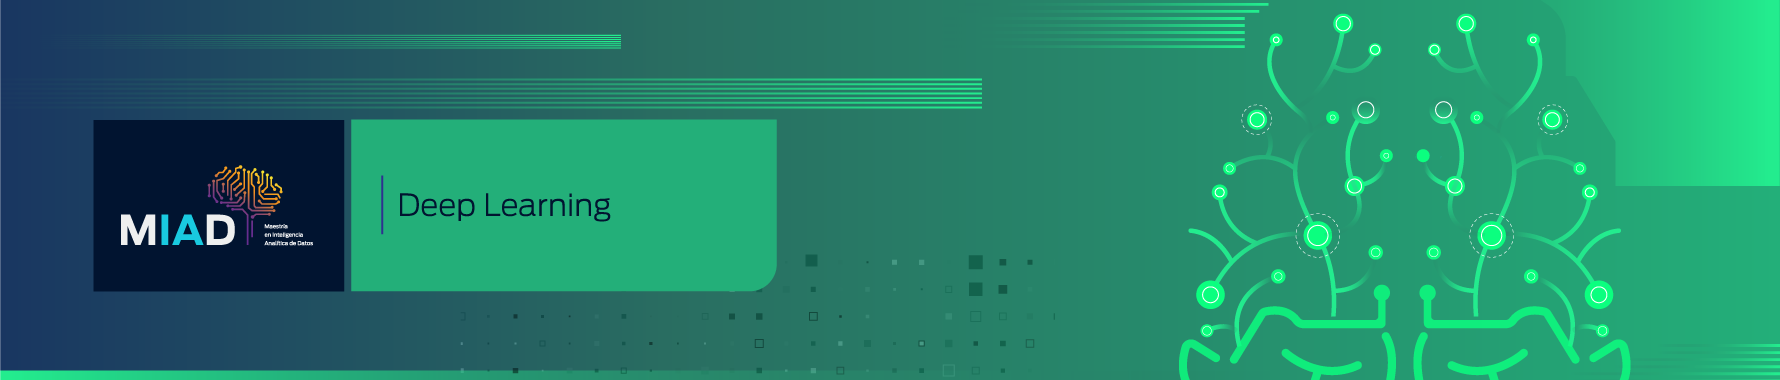

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv('BankChurners.csv')

In [4]:
# Lista de columnas continuas
columnas_a_eliminar = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Eliminar las columnas del DataFrame
data = data.drop(columns=columnas_a_eliminar)

In [5]:
# Mapear los valores de la columna Attrition_Flag
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [6]:
data = data.dropna()

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

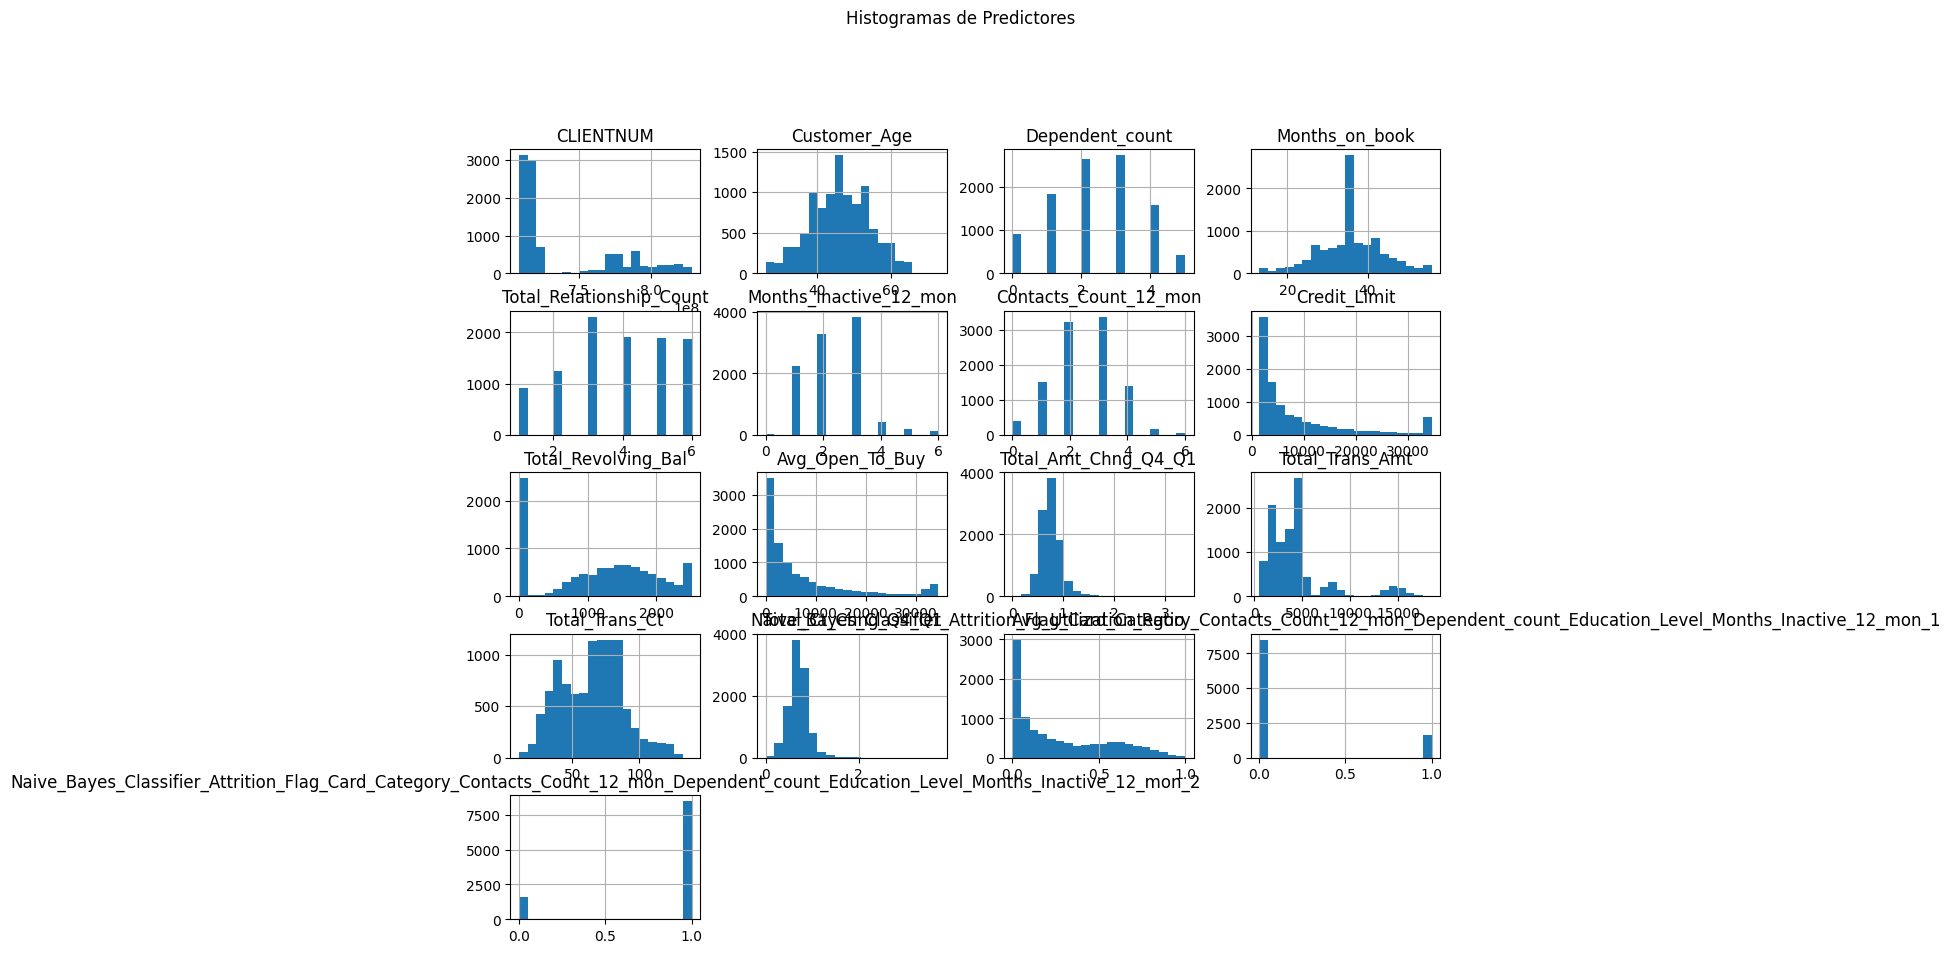

In [7]:
# Visualización de histogramas para predictores
predictores = data.drop(columns=['Attrition_Flag'])
predictores.hist(bins=20, figsize=(12, 10))
plt.suptitle('Histogramas de Predictores', y=1.02)
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

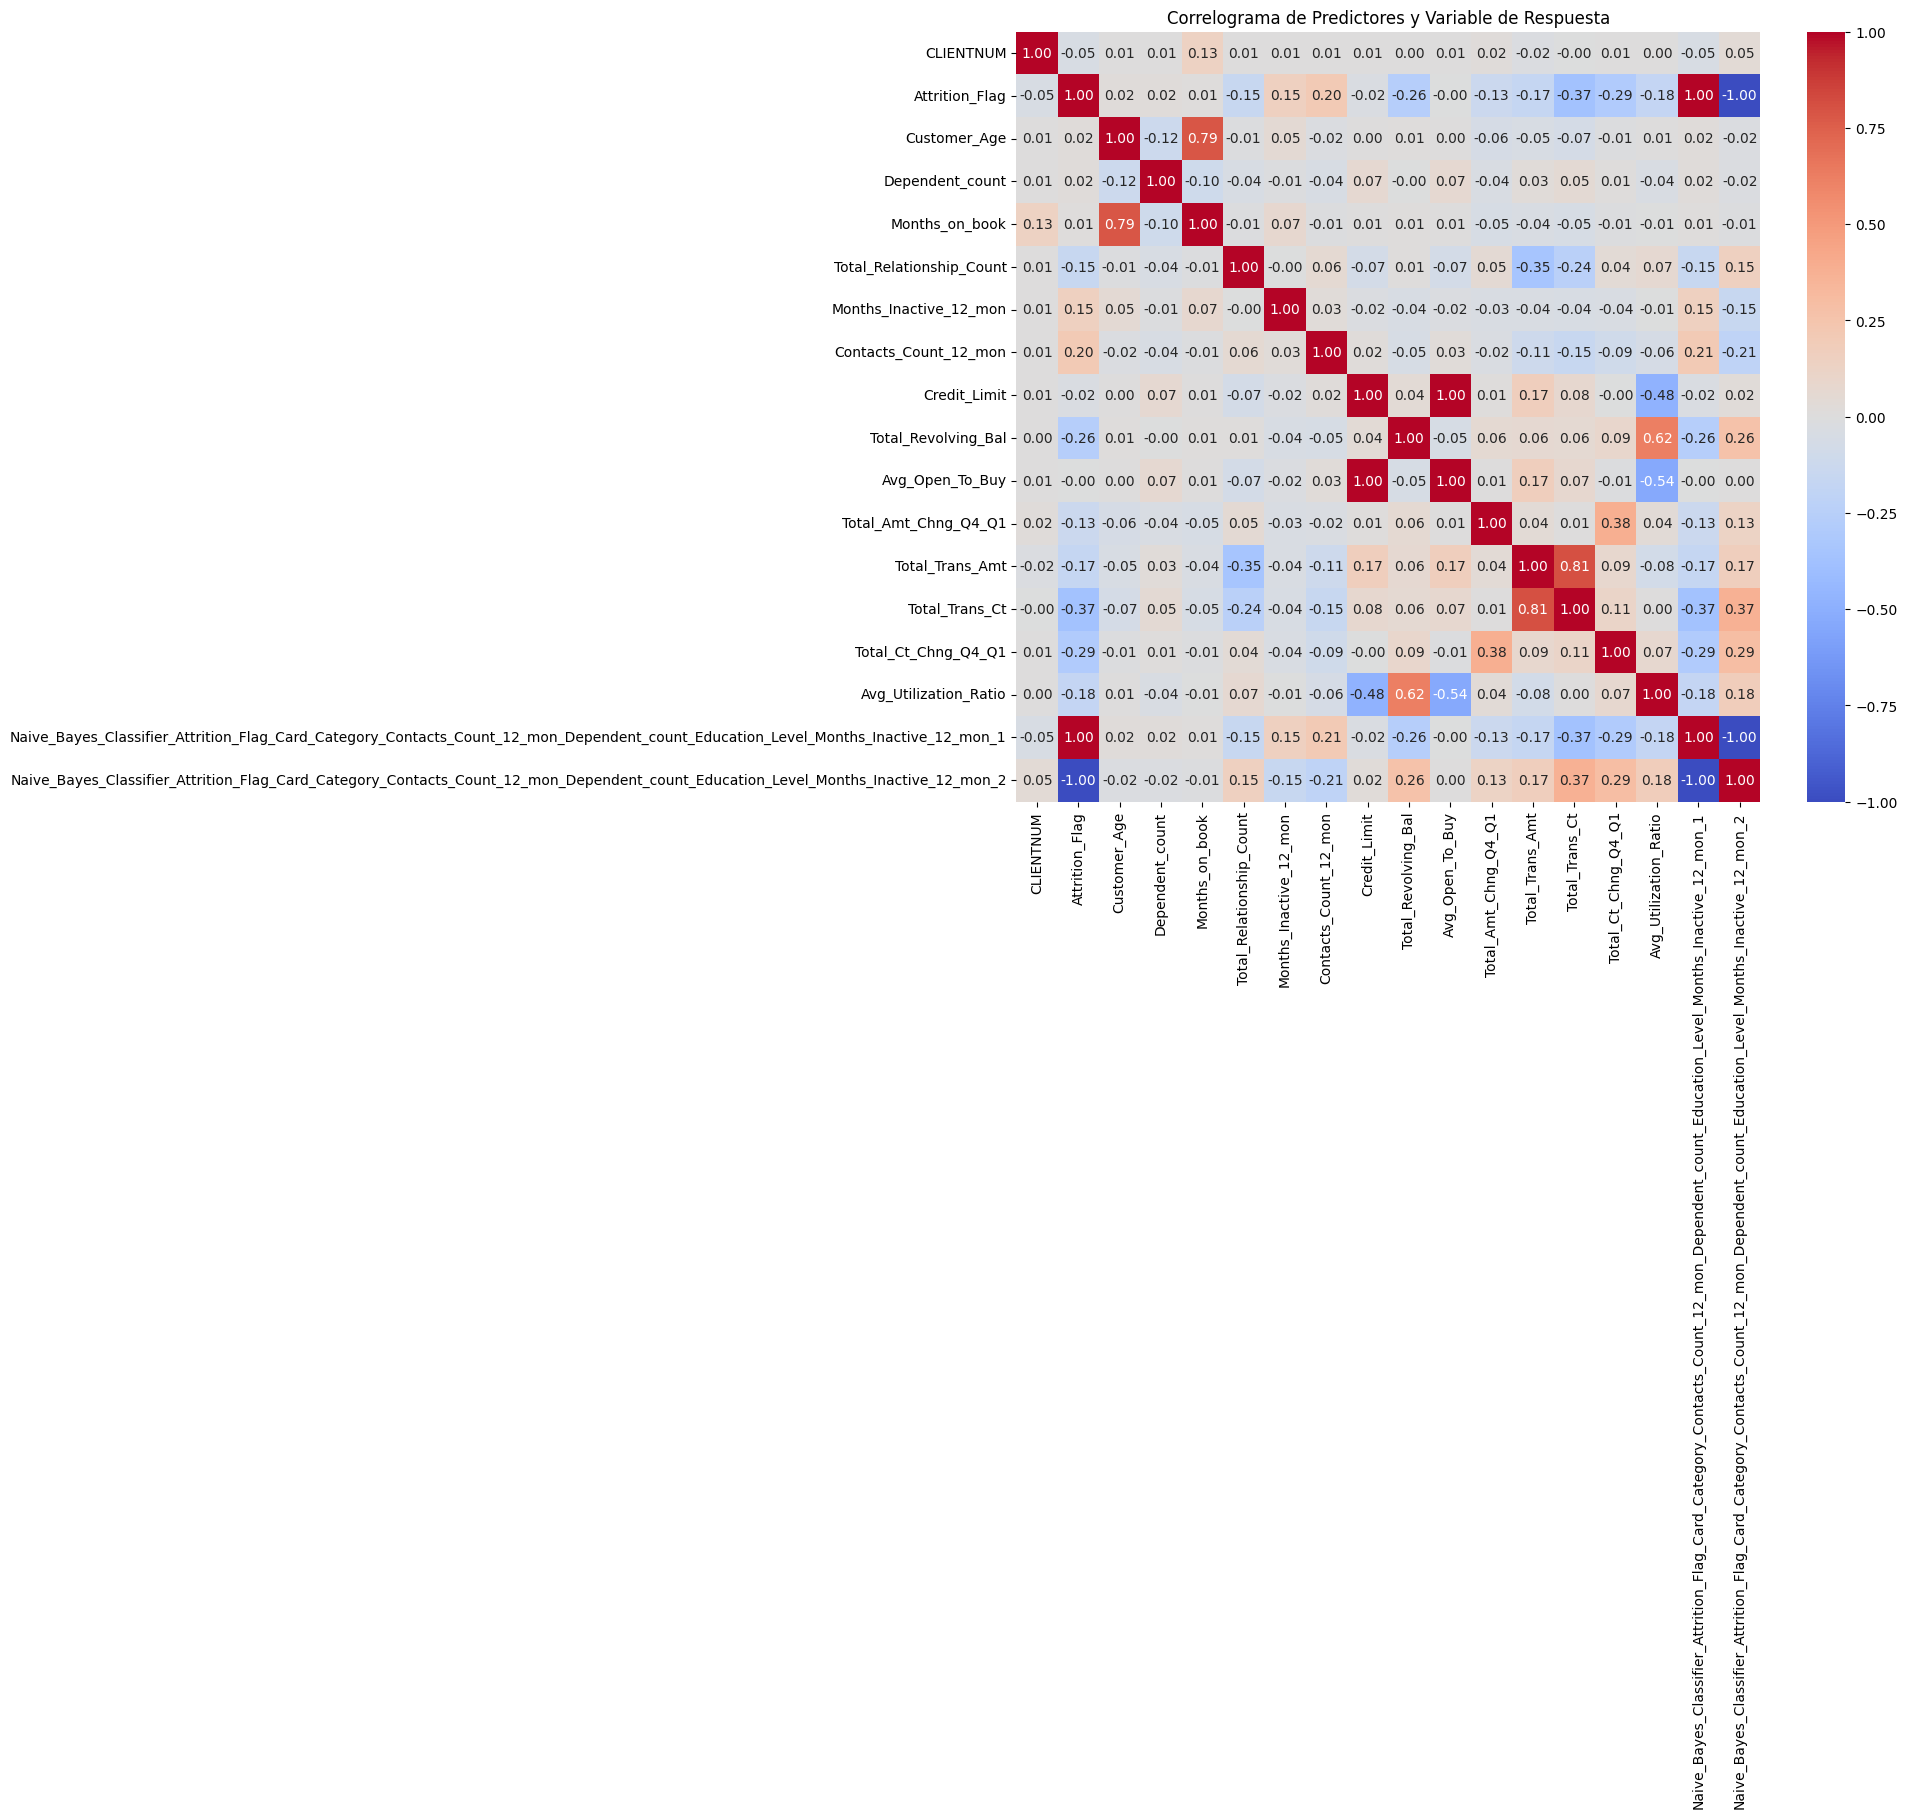

In [8]:
# Correlograma de predictores y variable de respuesta
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlograma de Predictores y Variable de Respuesta')
plt.show()

In [9]:
# Estadísticas descriptivas de predictores y variable de respuesta
descripcion = data.describe()
print(descripcion)

          CLIENTNUM  Attrition_Flag  Customer_Age  Dependent_count  \
count  1.012700e+04    10127.000000  10127.000000     10127.000000   
mean   7.391776e+08        0.160660     46.325960         2.346203   
std    3.690378e+07        0.367235      8.016814         1.298908   
min    7.080821e+08        0.000000     26.000000         0.000000   
25%    7.130368e+08        0.000000     41.000000         1.000000   
50%    7.179264e+08        0.000000     46.000000         2.000000   
75%    7.731435e+08        0.000000     52.000000         3.000000   
max    8.283431e+08        1.000000     73.000000         5.000000   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.0000

### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

In [10]:
# Definir X y y
X = data[['CLIENTNUM', 'Attrition_Flag']]
y = data['Attrition_Flag']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Normalizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

C:\Users\dshar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model2 = Sequential()
model2.add(Dense(64,input_shape=(X_train_scaled.shape[1],), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='relu'))

In [15]:
model3 = Sequential()
model3.add(Dense(64, input_shape=(X_train_scaled.shape[1],),activation='softplus'))
model3.add(Dense(32, activation='softplus'))
model3.add(Dense(1, activation='softplus'))

In [16]:
model4 = Sequential()
model4.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='softsign'))
model4.add(Dense(32, activation='softsign'))
model4.add(Dense(1, activation='softsign'))

In [17]:
model5 = Sequential()
model5.add(Dense(64, input_shape=(X_train_scaled.shape[1],),  activation='tanh'))
model5.add(Dense(32, activation='tanh'))
model5.add(Dense(1, activation='tanh'))

In [18]:
model6 = Sequential()
model6.add(Dense(64, input_shape=(X_train_scaled.shape[1],),  activation='selu'))
model6.add(Dense(32, activation='selu'))
model6.add(Dense(1, activation='selu'))

In [19]:
model7 = Sequential()
model7.add(Dense(64, input_shape=(X_train_scaled.shape[1],),  activation='elu'))
model7.add(Dense(32, activation='elu'))
model7.add(Dense(1, activation='elu'))

### Compilación de los modelos 

In [20]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Se entrenan los modelos con los datos de entrenamiento

In [21]:
history1=model1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
history2=model2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2 )
history3=model3.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2 )
history4=model4.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2 )
history5=model5.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)
history6=model6.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2 )
history7=model7.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2 )

Epoch 1/10
222/222 - 1s - 6ms/step - accuracy: 0.7214 - loss: 2138563.7500
Epoch 2/10
222/222 - 0s - 1ms/step - accuracy: 0.7346 - loss: 551976.2500
Epoch 3/10
222/222 - 0s - 1ms/step - accuracy: 0.7366 - loss: 601566.9375
Epoch 4/10
222/222 - 0s - 1ms/step - accuracy: 0.7383 - loss: 503681.4375
Epoch 5/10
222/222 - 0s - 1ms/step - accuracy: 0.7332 - loss: 541967.8750
Epoch 6/10
222/222 - 0s - 1ms/step - accuracy: 0.7315 - loss: 525419.5625
Epoch 7/10
222/222 - 0s - 1ms/step - accuracy: 0.7343 - loss: 422435.0312
Epoch 8/10
222/222 - 0s - 1ms/step - accuracy: 0.7346 - loss: 503187.1562
Epoch 9/10
222/222 - 0s - 1ms/step - accuracy: 0.7304 - loss: 317961.0312
Epoch 10/10
222/222 - 0s - 1ms/step - accuracy: 0.7290 - loss: 485041.4688
Epoch 1/10
222/222 - 1s - 5ms/step - accuracy: 0.8404 - loss: 2.5719
Epoch 2/10
222/222 - 0s - 1ms/step - accuracy: 0.8404 - loss: 2.5719
Epoch 3/10
222/222 - 0s - 985us/step - accuracy: 0.8404 - loss: 2.5719
Epoch 4/10
222/222 - 0s - 905us/step - accuracy: 

In [27]:
_, accuracy = model1.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model2.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model3.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model4.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model5.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model6.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

_, accuracy = model7.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8435 - loss: 724411.8125
Accuracy: 84.04
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8435 - loss: 2.5231
Accuracy: 84.04
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8435 - loss: 2.5231
Accuracy: 84.04
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.8435 - loss: 2.5231
Accuracy: 84.04
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 2.5231
Accuracy: 84.04
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.1565 - loss: 13.4468
Accuracy: 15.96
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8435 - loss: 2.5231
Accuracy: 84.04


In [22]:
predicciones1 = model1.predict(X_test)
redondeado1 = [round(x[0]) for x in predicciones1]
predicciones1 = (model1.predict(X_test) > 0.5).astype(int)

predicciones2 = model2.predict(X_test)
redondeado2 = [round(x[0]) for x in predicciones2]
predicciones2 = (model2.predict(X_test) > 0.5).astype(int)

predicciones3 = model3.predict(X_test)
redondeado3 = [round(x[0]) for x in predicciones3]
predicciones3 = (model3.predict(X_test) > 0.5).astype(int)

predicciones4 = model4.predict(X_test)
redondeado4 = [round(x[0]) for x in predicciones4]
predicciones4 = (model4.predict(X_test) > 0.5).astype(int)

predicciones5 = model5.predict(X_test)
redondeado5 = [round(x[0]) for x in predicciones5]
predicciones5 = (model5.predict(X_test) > 0.5).astype(int)

predicciones6 = model6.predict(X_test)
redondeado6 = [round(x[0]) for x in predicciones6]
predicciones6 = (model6.predict(X_test) > 0.5).astype(int)

predicciones7 = model7.predict(X_test)
redondeado7 = [round(x[0]) for x in predicciones7]
predicciones7 = (model7.predict(X_test) > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step


In [23]:
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
test_loss4, test_acc4 = model4.evaluate(X_test, y_test)
test_loss5, test_acc5 = model5.evaluate(X_test, y_test)
test_loss6, test_acc6 = model6.evaluate(X_test, y_test)
test_loss7, test_acc7 = model7.evaluate(X_test, y_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.8499 - loss: 693562.8125
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.8499 - loss: 2.4188
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.8499 - loss: 2.4188
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8499 - loss: 2.4188
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.8499 - loss: 2.4188
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.1501 - loss: 13.5499
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.8499 - loss: 2.4188


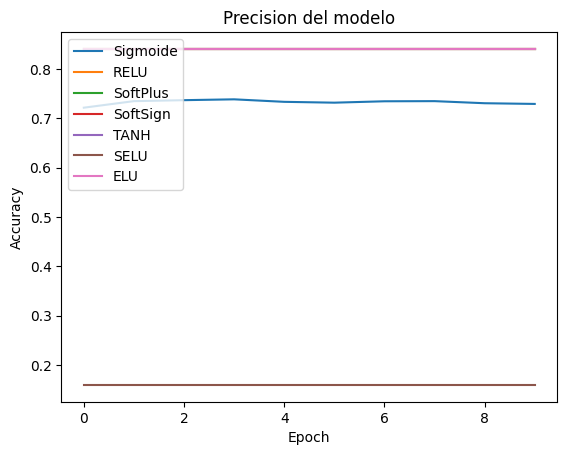

In [24]:
plt.figure(1)
# Graficar accuracy del modelo
plt.title('Precision del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history7.history['accuracy'])

plt.legend(['Sigmoide', 'RELU', 'SoftPlus', 'SoftSign', 'TANH','SELU','ELU' ], loc='upper left')
plt.show()

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

In [25]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)